# 1. Read the target and type of regression to be run

In [1]:
# import the necessary library
import json
import pandas as pd

In [2]:
#JSON string 

target = '{"prediction_type": "Regression","target": "petal_width","type":"regression","partitioning": true}'

# convert string dict to python
target_dict = json.loads(target)
print(target_dict)

print(target_dict['type'])


{'prediction_type': 'Regression', 'target': 'petal_width', 'type': 'regression', 'partitioning': True}
regression


# 2. Read the features(which are column names in the csv) and figure out what missing imputation needs to be applied and apply that to the columns loaded in a dataframe 

In [3]:
#read the dataset
df = pd.read_csv(r'D:\Health\Internshala_DS_test\Internshala\iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
numerical = [var_1 for var_1 in df.columns if df[var_1].dtype=='float64']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 4 numerical variables

The numerical variables are :

 ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


In [9]:
for var in numerical: 
    
    print(df[var].value_counts())

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: sepal_width, dtype: int64
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7  

In [10]:
# there is no missing values nor the values with 0.

# 3. Parse the json and make the model objects

In [11]:
# list of fetures and targets
n_samples,n_features = df.shape
print(n_samples)
print(n_features)

150
5


In [12]:
df['species'].value_counts(0)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 1)


#ftting logistic regression to trainng test
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)
y_pre = clf.predict(X_test)


#confusion matrix
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test,y_pre)
m


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pre)
accuracy

0.9666666666666667

In [15]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# 4. Run the fit and predict on each model

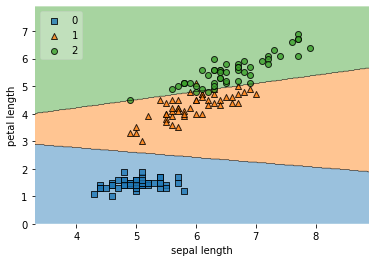

In [16]:

from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

iris = load_iris()
y, X = iris.target, iris.data[:, [0, 2]] 
lr = LogisticRegression(C=50.0, 
                        class_weight=None, 
                        dual=False, 
                        fit_intercept=True,
                        intercept_scaling=1, 
                        max_iter=50, 
                        multi_class='multinomial', 
                        n_jobs=1,
                        penalty='l2', 
                        random_state=1, 
                        solver='newton-cg', 
                        tol=0.0001,
                        verbose=0, 
                        warm_start=False)
lr.fit(X, y)
plot_decision_regions(X=X, y=y, clf=lr, legend=2)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.show()

In [17]:
lr.get_params()

{'C': 50.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 50,
 'multi_class': 'multinomial',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}